# Ejemplo de uso del módulo: Amplificador con BJT
### Diseñe un amplificador con las siguientes características 
$I_E = 1 \hspace{0.1cm} mA,\quad V_{CC}=10 \hspace{0.1cm} V, \quad R_L = 1 \hspace{0.1cm} k\Omega, \quad A_V = 10$

In [1]:
import numpy as np
import divisor as dv

#Especificaciones 
IE = 1e-3
re = 25e-3/IE
RL = 1e3
A = 10

### Resistencia de colector

In [2]:
RC = RL/((RL/(A*re))-1)
print(RC)

333.3333333333333


In [3]:
# Valor comercial más cercano
RC = dv.closest(RC)
print(RC)

330.0


### Resistencia de emisor

In [4]:
RE = 1/IE
print(RE)

1000.0


### Divisor de voltaje

In [5]:
#Seleccionamos un valor estandar para R2:
R2 = 1.2e3

#Calculamos R1:
kr = dv.k_r(10.0/1.7) # Vcc/Vout
R1 = dv.R1_given_R2(R2,kr)
print(R1)

5858.823529411765


In [6]:
# Valor comercial más cercano
R1 = dv.closest(R1)
print(R1)

5600.0


### Valores de resistencias ($\Omega$) :

In [7]:
from IPython.display import display, Math, Latex
display(Math(r'R_1 = {} \quad R_2 ={} \quad R_C={} \quad R_E={}'.format(R1,R2,RC,RE)))

<IPython.core.display.Math object>

### Gráfica de datos de simulación con LTspice

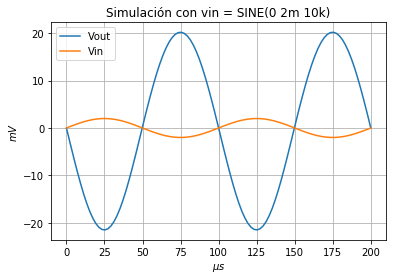

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

#Cargar datos de simulación
df = pd.read_table('BJT_Amp.txt',sep='\t')

#Graficar
plt.plot(1e6*df['time'],1e3*df['V(vout)'],label='Vout')
plt.plot(1e6*df['time'],1e3*df['V(vin)'],label='Vin')
plt.title(u'Simulación con vin = SINE(0 2m 10k)')
plt.xlabel('$\mu s$')
plt.ylabel('$mV$')
plt.legend()
plt.grid(True)
plt.show()